In [1]:
# Alex Tresselt
# CS 7180
# 12/13/18
# File used to create charts for the final report

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('Call_Data.csv')

In [5]:
df.count()

CAD Event Number               3713328
Event Clearance Description    3713328
Call Type                      3713328
Priority                       3713328
Initial Call Type              3713328
Final Call Type                3713328
Original Time Queued           3713328
Arrived Time                   3713328
Precinct                       3713328
Sector                         3677893
Beat                           3713328
dtype: int64

In [6]:
# Remove missing data
df.dropna(inplace = True)
df.count()

CAD Event Number               3677893
Event Clearance Description    3677893
Call Type                      3677893
Priority                       3677893
Initial Call Type              3677893
Final Call Type                3677893
Original Time Queued           3677893
Arrived Time                   3677893
Precinct                       3677893
Sector                         3677893
Beat                           3677893
dtype: int64

In [7]:
# Figure 1 First 5 rows of the Call Data dataset 
df.head()

,CAD Event Number,Event Clearance Description,Call Type,Priority,Initial Call Type,Final Call Type,Original Time Queued,Arrived Time,Precinct,Sector,Beat
0,2009000287074,ASSISTANCE RENDERED,"TELEPHONE OTHER, NOT 911",1,SHOTS - IP/JO - INCLUDES HEARD/NO ASSAULT,--DISTURBANCE - OTHER,08/14/2009 11:12:34 PM,Aug 14 2009 11:13:55:000PM,EAST,GEORGE,G3
1,2009000287075,ASSISTANCE RENDERED,ONVIEW,7,"PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY",--PREMISE CHECKS - CRIME PREVENTION,08/14/2009 11:13:49 PM,Aug 14 2009 11:13:50:000PM,NORTH,LINCOLN,L1
2,2009000287078,OTHER REPORT MADE,ONVIEW,7,TRAFFIC STOP - OFFICER INITIATED ONVIEW,--TRAFFIC - MOVING VIOLATION,08/14/2009 11:16:20 PM,Aug 14 2009 11:16:20:000PM,NORTH,LINCOLN,L2
3,2009000287080,NO POLICE ACTION POSSIBLE OR NECESSARY,"TELEPHONE OTHER, NOT 911",4,"NOISE - DIST, GENERAL (CONST, RESID, BALL PLAY)",--DISTURBANCE - NOISE,08/14/2009 11:17:22 PM,Aug 15 2009 12:16:18:000AM,WEST,DAVID,D2
4,2009000287081,ASSISTANCE RENDERED,911,1,UNKNOWN - ANI/ALI - LANDLINE (INCLUDES OPEN LINE),"--ASSIST PUBLIC - 911 HANG UP, OPEN LINE",08/14/2009 11:17:34 PM,Aug 15 2009 01:40:09:000AM,SOUTH,OCEAN,O2


In [8]:
# Figure 4 Top 10 Most Reported Crimes, 2009-2018
df.groupby('Final Call Type').size().sort_values(ascending=False)[:10]

Final Call Type
--PREMISE CHECKS - CRIME PREVENTION                319630
--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON           308718
--DISTURBANCE - OTHER                              263116
--TRAFFIC - MOVING VIOLATION                       209521
--TRAFFIC - PARKING VIOL (EXCEPT ABANDONED CAR)    190080
--TRAFFIC - MV COLLISION INVESTIGATION             167921
--ASSIST PUBLIC - OTHER (NON-SPECIFIED)            132945
--SUSPICIOUS CIRCUM. - SUSPICIOUS VEHICLE           93011
--THEFT - CAR PROWL                                 82681
--PROWLER - TRESPASS                                82520
dtype: int64

In [9]:
# Event Clearance, as percent of total
df.groupby('Event Clearance Description').size().sort_values(ascending=False)[:10] * 100 / len(df)

Event Clearance Description
ASSISTANCE RENDERED                           43.694610
REPORT WRITTEN (NO ARREST)                    20.209125
UNABLE TO LOCATE INCIDENT OR COMPLAINANT       6.361387
ORAL WARNING GIVEN                             5.645270
CITATION ISSUED (CRIMINAL OR NON-CRIMINAL)     5.063116
PHYSICAL ARREST MADE                           3.229621
OTHER REPORT MADE                              2.807559
NO POLICE ACTION POSSIBLE OR NECESSARY         2.513994
FALSE COMPLAINT/UNFOUNDED                      2.299605
PROBLEM SOLVING PROJECT                        2.223474
dtype: float64

In [10]:
# Top 10 reported crimes in beat D3 (where Northeastern's campus is located)
d3 = df.groupby('Beat').get_group('D3')
d3.groupby('Final Call Type').size().sort_values(ascending=False)[:10]

Final Call Type
--PREMISE CHECKS - CRIME PREVENTION                8800
-OFF DUTY EMPLOYMENT                               8592
--TRAFFIC - PARKING VIOL (EXCEPT ABANDONED CAR)    6393
--DISTURBANCE - OTHER                              5765
--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON           5133
--TRAFFIC - MV COLLISION INVESTIGATION             3923
--TRAFFIC - MOVING VIOLATION                       2534
--PROWLER - TRESPASS                               2147
--CRISIS COMPLAINT - GENERAL                       2103
--MISCHIEF OR NUISANCE - GENERAL                   2042
dtype: int64

In [11]:
# Bottom 10, least reported crimes
df.groupby('Final Call Type').size().sort_values(ascending=True)[:10]

Final Call Type
PURSUIT (FOOT OR VEHICLE)                             1
ALARM - EQUIPMENT                                     1
KNOWN KIDNAPPNG                                       1
NORAD - INCIDENTS INV AIRCRAFT (EXCL CRASHES)         1
TRAFFIC PURSUIT - OFFICER INITIATED ONVIEW            1
VICE - VIOLATION OF SOAP ORDER                        1
TRU - ASLT - MOLESTED ADULT (GROPED, FONDLED, ETC)    1
UNUSUAL OCCURRENCES - EARTHQUAKE, RIOT, ETC)          1
TRU - THREATS                                         1
ESCAPE - IP/JO - PRISONER                             1
dtype: int64

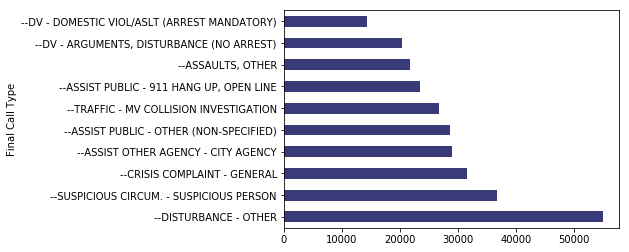

In [12]:
# Top 10 reported priority 1 calls
p1 = df.groupby('Priority').get_group(1)
p1c = p1.groupby('Final Call Type').size().sort_values(ascending=False)[:10]
p1c.plot.barh(colormap='tab20b')

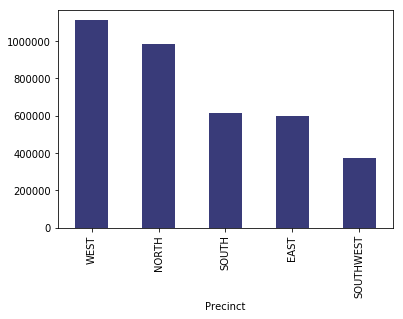

In [13]:
# Total calls by precinct
df.groupby('Precinct').size().sort_values(ascending=False).plot.bar(colormap='tab20b')

In [14]:
# Format time columns
df['Arrived Time'] = pd.to_datetime(df['Arrived Time'], format="%b %d %Y %I:%M:%S:%f%p")
df['Original Time Queued'] = pd.to_datetime(df['Original Time Queued'], format="%m/%d/%Y %I:%M:%S %p")

In [15]:
# Create more time columns 
df['Response Time'] = df['Arrived Time'] - df['Original Time Queued']
df['Rmins'] = df['Response Time'].dt.total_seconds() / 60
df['Rmins'] = round(df['Rmins'])


df['hour'] = df['Original Time Queued'].dt.hour
df['day'] = df['Original Time Queued'].dt.weekday

df['Response'] = round(df['Rmins'], -1) # round to nearest 10 minutes for better prediction

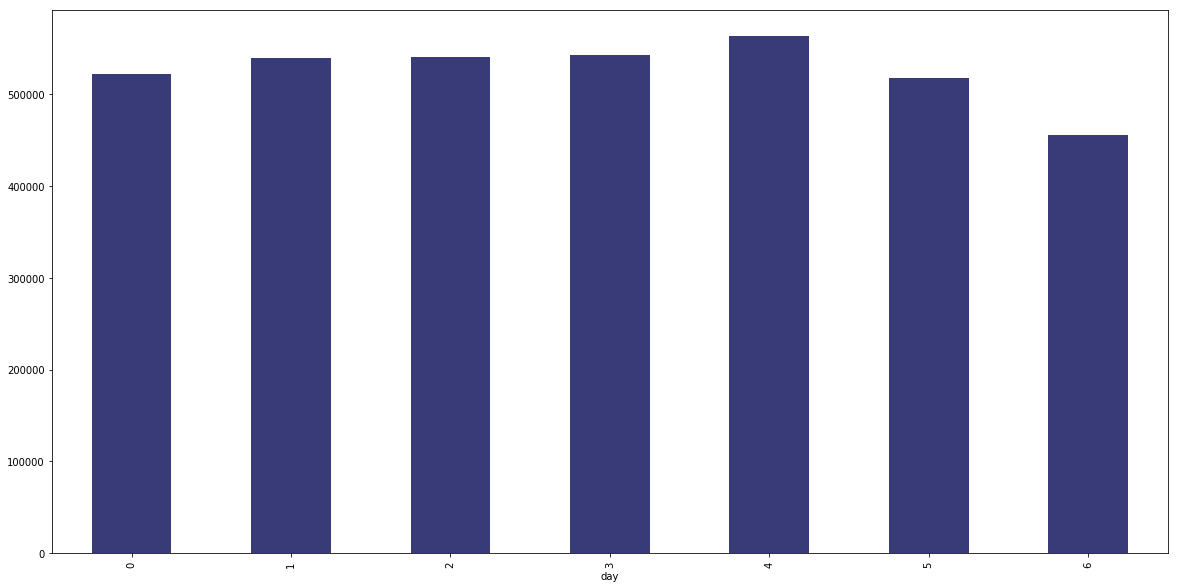

In [16]:
# Figure 6 Calls by day of week, 2009-2018
df.groupby('day').size().plot.bar(figsize=[20,10], colormap='tab20b')

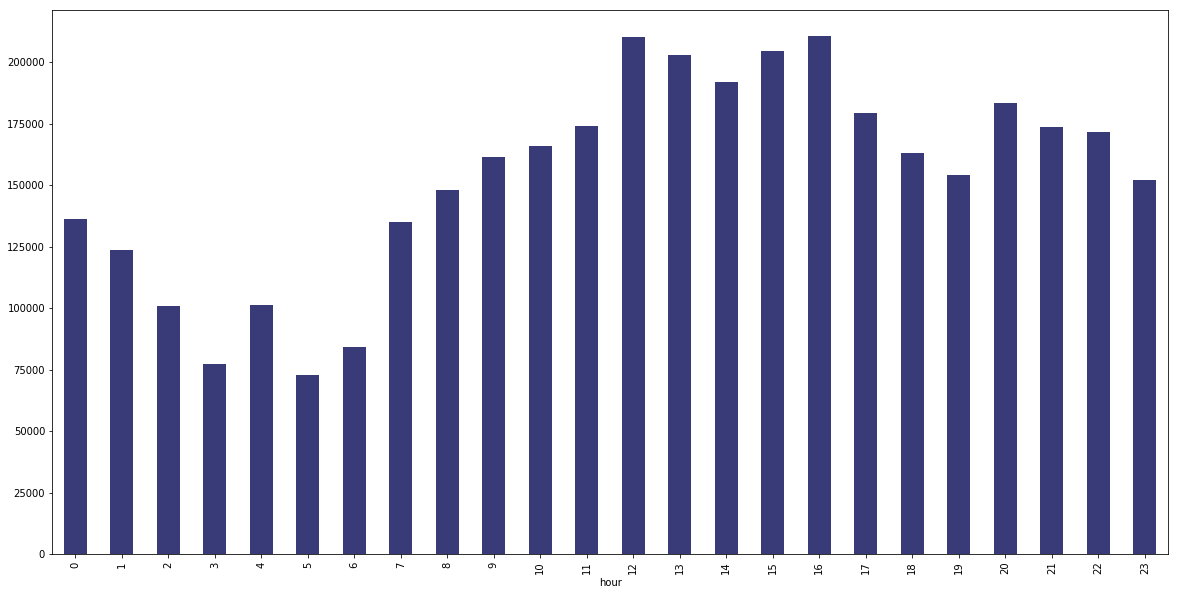

In [17]:
# Figure 7 Calls grouped by hour, 2009-2018
hplt = df.groupby('hour').size()
hplt.plot.bar(figsize=[20,10], colormap='tab20b')

In [18]:
# Drop all calls with response times of more than 1 day
df = df.drop(df[df['Rmins'] >= 1440].index)
df = df.drop(df[df['Rmins'] <= 0].index)

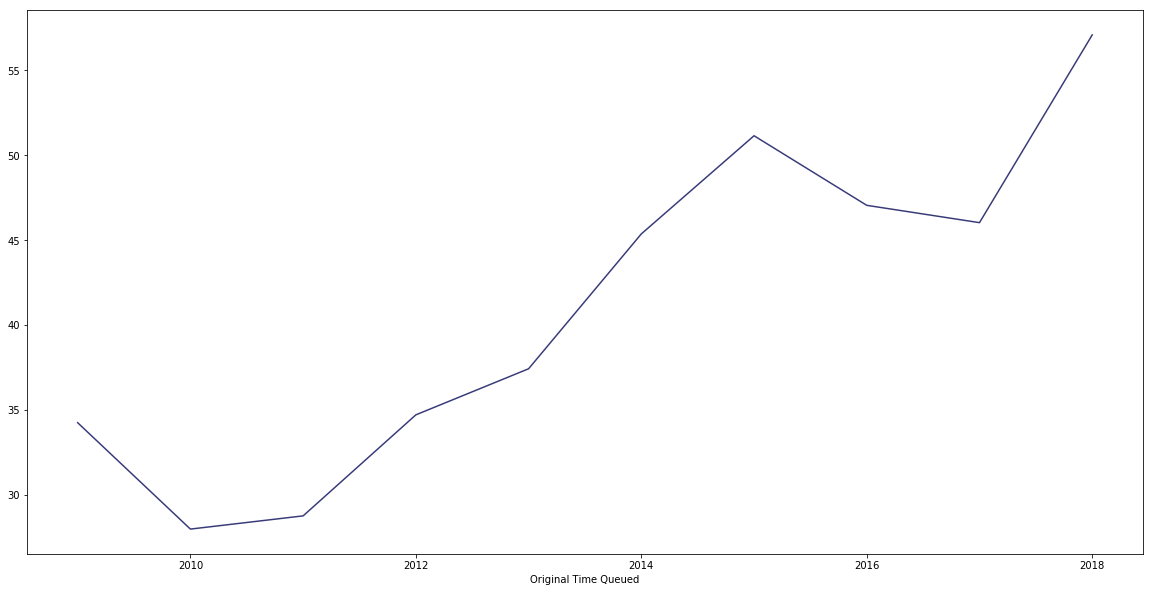

In [19]:
# Figure 10 Average Response Times in Minutes from 2009-2018
rt = df.groupby(df['Original Time Queued'].dt.year)
rt['Rmins'].mean().plot.line(figsize=[20,10], colormap='tab20b')

In [20]:
#rt.groupby('Priority').plot.line()

In [21]:
df.groupby('Call Type').size()

Call Type
911                              1152256
ALARM CALL (NOT POLICE ALARM)      95916
FK ERROR                               1
HISTORY CALL (RETRO)                  50
IN PERSON COMPLAINT                   34
ONVIEW                              1068
POLICE (VARDA) ALARM                 138
PROACTIVE (OFFICER INITIATED)         34
SCHEDULED EVENT (RECURRING)           22
TELEPHONE OTHER, NOT 911          698669
dtype: int64

In [25]:
# Drop all calls that were not 911 calls.
df = df.drop(df[df['Call Type'] != '911'].index)

In [27]:
df['year'] = df['Original Time Queued'].dt.year

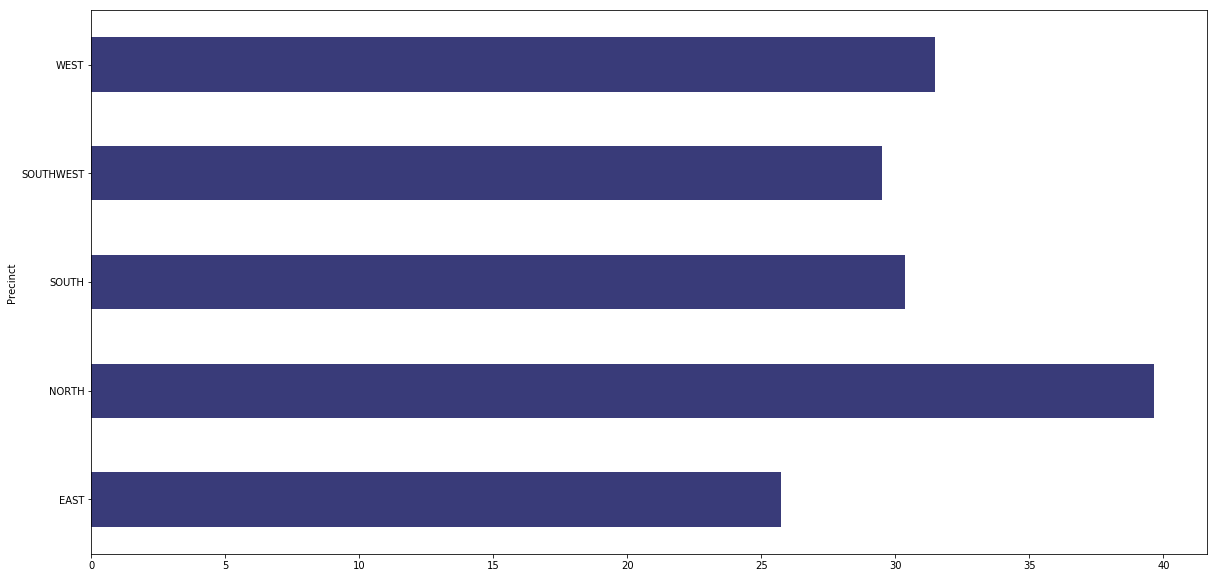

In [28]:
# Figure 11 Average Response Time by Precinct, 2017
rbp = df.groupby('year').get_group(2017)
rbp = rbp.groupby('Precinct')
rbp['Rmins'].mean().plot.barh(figsize=[20,10], colormap='tab20b')

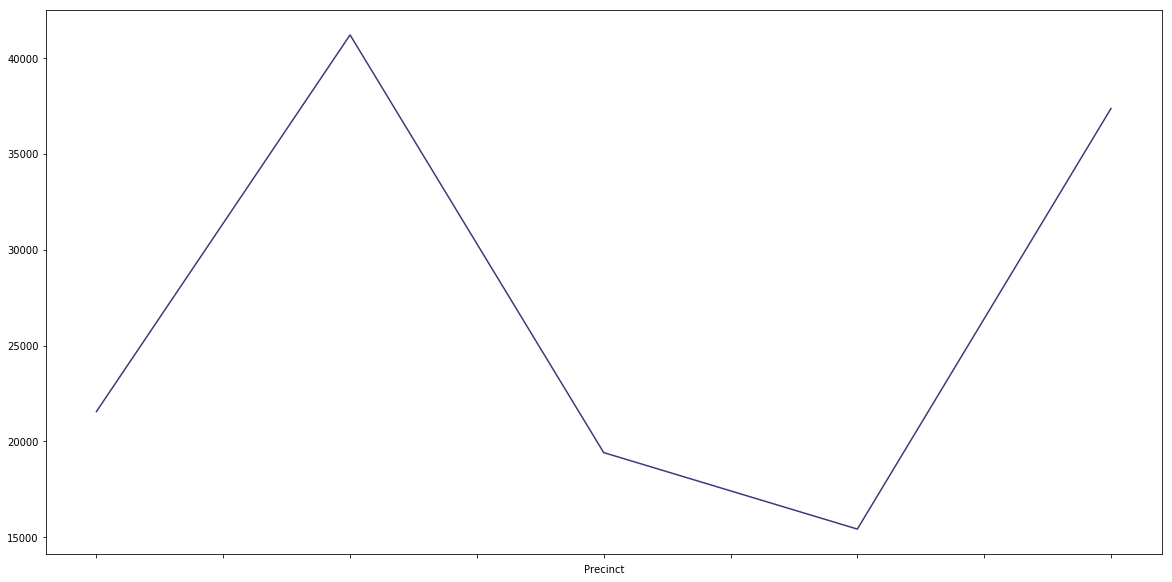

In [29]:
rbb = df.groupby('year').get_group(2017)
rbb = rbb.groupby('Precinct')
rbb['Priority'].size().plot.line(figsize=[20,10], colormap='tab20b')

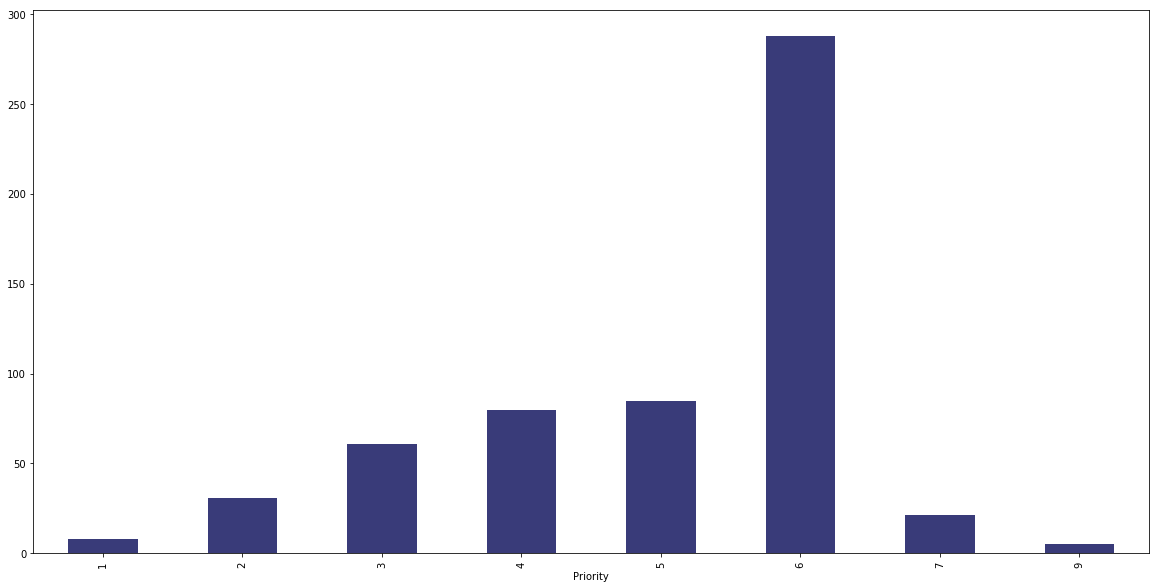

In [30]:
# Average response time by priority in 2017
r2017 = df.groupby('year').get_group(2017)
rbp1 = r2017.groupby('Priority')
rbp1['Rmins'].mean().plot.bar(figsize=[20,10], colormap='tab20b')

In [31]:
# Figure 12 Response Time Statistics for 2017
rbp1['Rmins'].describe()

,count,mean,std,min,25%,50%,75%,max
Priority,,,,,,,,
1,36725.0,8.078502,8.989111,1.0,4.00,6.0,10.00,292.0
2,64058.0,30.953167,43.894056,1.0,7.00,14.0,36.00,927.0
3,32236.0,60.719630,77.417079,1.0,12.00,30.0,79.00,1257.0
4,1264.0,79.829905,98.727463,1.0,15.00,45.0,103.00,848.0
5,635.0,84.968504,90.234267,1.0,17.00,64.0,125.00,1134.0
6,60.0,287.766667,252.483755,1.0,84.75,196.0,455.00,947.0
7,2.0,21.500000,24.748737,4.0,12.75,21.5,30.25,39.0
9,1.0,5.000000,NaN,5.0,5.00,5.0,5.00,5.0


In [32]:
df['minute'] = df['Original Time Queued'].dt.minute
df['month'] = df['Original Time Queued'].dt.month

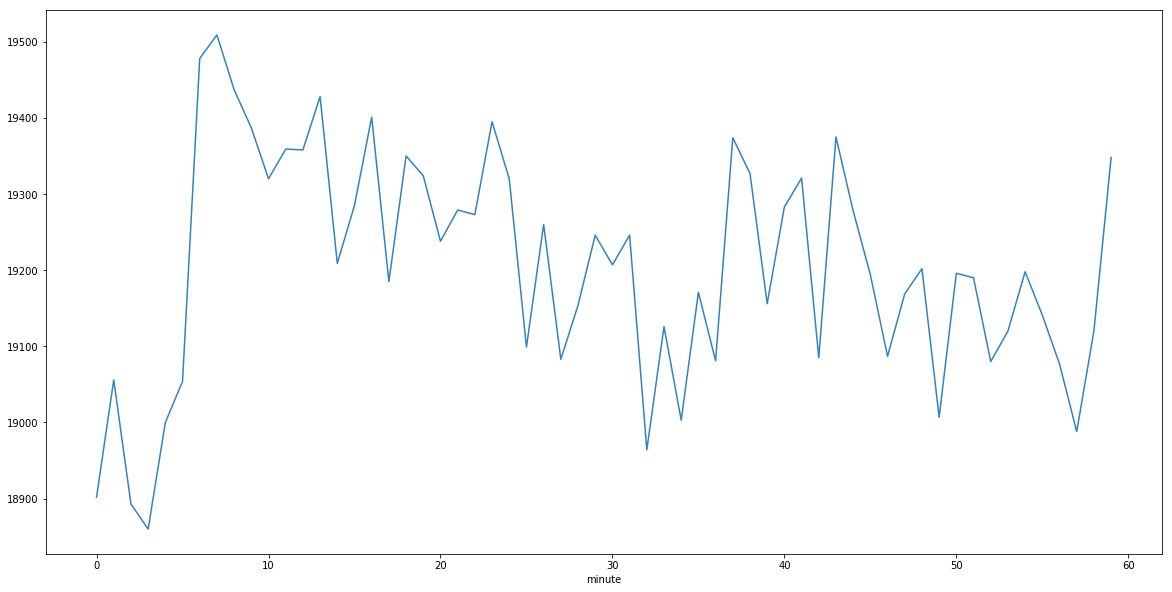

In [33]:
# Figure 9 Calls by minute, 2009 - 2018 using a line plot
mplt = df.groupby('minute').size()
mplt.plot.line(figsize=[20,10], colormap='tab20c')

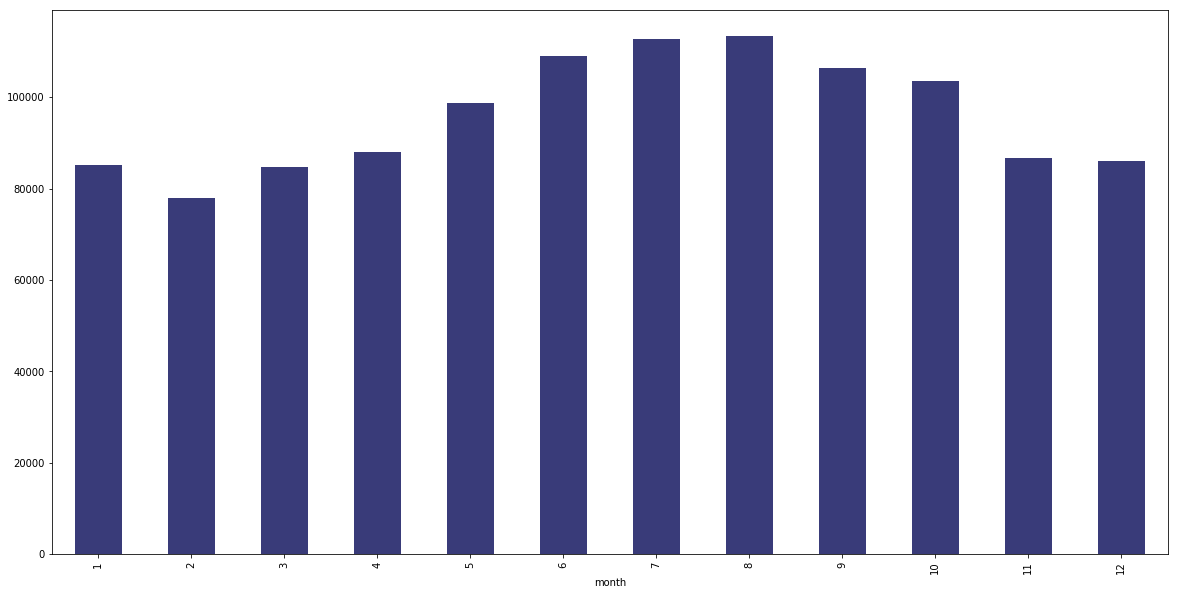

In [34]:
# Figure 5 Calls by Month, 2009-2018
mmplt = df.groupby('month').size()
mmplt.plot.bar(figsize=[20,10], colormap='tab20b')